In [18]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from utils import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
# Edit these paths to point to the csv files 
calm_csv_path = r'..\recordings\2023-09-29_12-20-54_calmround.csv'
swerve_csv_path = r'..\recordings\2023-09-29_12-25-53_swerving.csv'
calm_df = pd.read_csv(calm_csv_path)
swerve_df = pd.read_csv(swerve_csv_path)

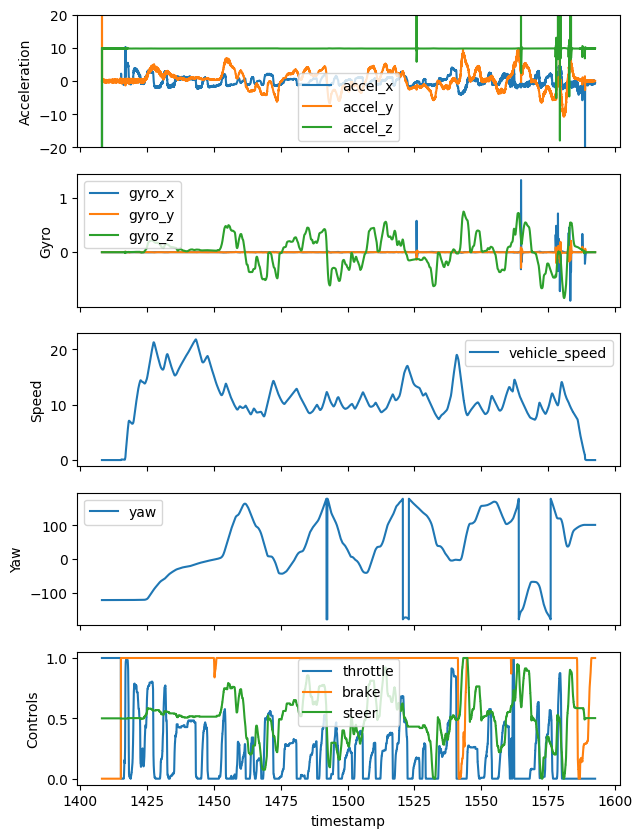

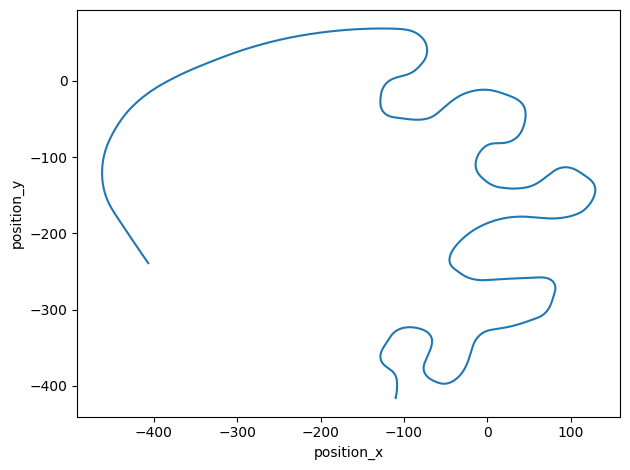

In [13]:
# Plot all the available data in calm_df
data = calm_df

acc = data[['timestamp', 'accel_x', 'accel_y', 'accel_z']]
gyro = data[['timestamp', 'gyro_x', 'gyro_y', 'gyro_z']]
speed = data[['timestamp', 'vehicle_speed']]
controls = data[['timestamp','throttle', 'brake','steer']]
# gps = data[['timestamp', 'gps_latitude', 'gps_longitude', 'gps_altitude']]

# create plots for acc, gyro, speed, controls (scale them vs max), and gps
fig, axs = plt.subplots(5, 1, figsize=(7, 10), sharex=True)

acc.plot(x='timestamp', ax=axs[0])
axs[0].set_ylabel('Acceleration')
axs[0].set_ylim((-20,20))

gyro.plot(x='timestamp', ax=axs[1])
axs[1].set_ylabel('Gyro')

speed.plot(x='timestamp', ax=axs[2])
axs[2].set_ylabel('Speed')

data.plot(x='timestamp', y='yaw', ax=axs[3])
axs[3].set_ylabel('Yaw')

scaler = MinMaxScaler() # controls are scaled to 0-1
controls_scaled = controls.copy()
controls_scaled[['throttle', 'brake','steer']] = scaler.fit_transform(controls[['throttle', 'brake','steer']])
controls_scaled.plot(x='timestamp', ax=axs[4])
axs[4].set_ylabel('Controls')

# gps.plot(x='timestamp', y=['gps_latitude', 'gps_longitude', 'gps_altitude'], ax=axs[4])
# axs[4].set_ylabel('GPS')
fig, ax = plt.subplots()
plt.plot(data.position_x, -data.position_y) # I think the minus fixes the orientation
plt.xlabel('position_x')
plt.ylabel('position_y')

plt.tight_layout()


In [31]:
# compare steer std of the calm and swerving rides, boxplot of steer
steer_calm = calm_df.steer
steer_swerve = swerve_df.steer

# Compute metrics for steer_calm and steer_swerve
metrics_calm = {'std_dev': np.std(steer_calm), 'max': np.max(np.abs(steer_calm))}
metrics_swerve = {'std_dev': np.std(steer_swerve), 'max': np.max(np.abs(steer_swerve))}

steer_calm_rate = steer_calm.diff().abs().dropna()
steer_swerve_rate = steer_swerve.diff().abs().dropna()

metrics_calm_rate = {'std_dev': steer_calm_rate.std(), 'max': steer_calm_rate.max()}
metrics_swerve_rate = {'std_dev': steer_swerve_rate.std(), 'max': steer_swerve_rate.max()}

# Print metrics
print("Calm steer:", metrics_calm)
print("Swerve steer:", metrics_swerve)
print("Calm steer rate:", metrics_calm_rate)
print("Swerve steer rate:", metrics_swerve_rate)
plt.show()


Calm steer: {'std_dev': 0.0739984078470016, 'max': 0.1978026777505874}
Swerve steer: {'std_dev': 0.0832996314747195, 'max': 0.1978026777505874}
Calm steer rate: {'std_dev': 0.0011181252693537472, 'max': 0.0108597548096441}
Swerve steer rate: {'std_dev': 0.0017122548713328972, 'max': 0.018616724759340203}


In [27]:
# Each frame corresponds to a row in the csv file.

print('the video contains', count_total_frames(calm_csv_path[:-4] + '.mp4'), 'frames')
print('the wide video contains', count_total_frames(calm_csv_path[:-4] + '_wide.mp4'), 'frames')
print('the csv file contains', len(calm_df), 'rows')

the video contains 11652 frames
the wide video contains 11639 frames
the csv file contains 11654 rows


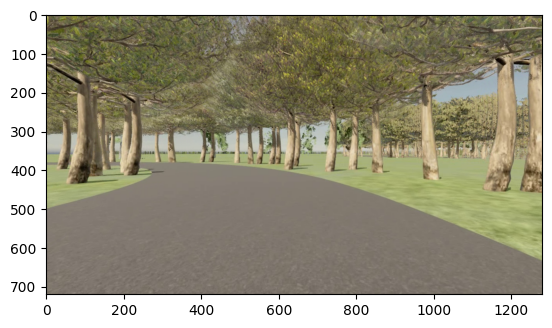

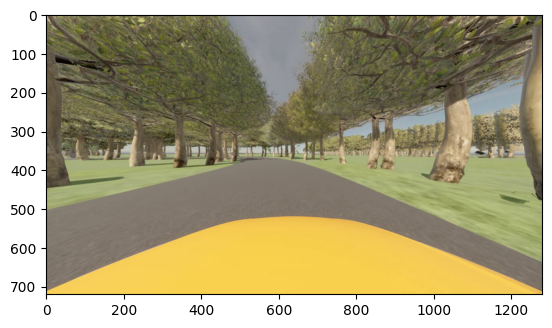

In [28]:
# You can show a frame using load_video_frame.

# todo: check if they are actually synchronized. It looks like the two frames are not in sync. But it could be the perspective. 
# Perhaps the top field of view is too narrow. Perhaps they do not start at the same time (see also differnce in number of frames).

frame_ix = 5000 # show 100th frame
load_video_frame(calm_csv_path[:-4] + '.mp4', frame_ix) # show frame from the video
load_video_frame(calm_csv_path[:-4] + '_wide.mp4', frame_ix) # show frame from the wide video


In [10]:
# I believe openpilot needs GPS coordinates at some point. We can create mock coordinates from the x and y positions.
x_origin, y_origin = 4.523204768439975, 58.89386778997622 # places origin of trajectory somewhere in Rotterdam
data['gps_latitude'], data['gps_longitude'] = xy_to_gps(data.position_x, data.position_y, x_origin, y_origin) 